<a href="https://colab.research.google.com/github/kimjongchan1/kimjongwoo/blob/master/%EA%B9%80%EC%A2%85%EC%9A%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 김종우 프로젝트

딥러닝 기반 동물 이미지 학습



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


### 사전 학습된 모델 불러오기

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()

In [ ]:
# 사전 학습된 모델 확인
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# 분류에 사용할 이미지 불러오기

from tensorflow.keras.preprocessing.image import load_img
import os

img_path = os.getcwd() + '/pretrained_learning/img/'

dog_img = load_img(img_path+'dog.jpg',target_size=(224,224))
cat_img = load_img(img_path+'cat.jpg',target_size=(224,224))
hamster_img = load_img(img_path+'hamster.jpg',target_size=(224,224))
parrot_img = load_img(img_path+'parrot.jpg',target_size=(224,224))
rabbit_img = load_img(img_path+'rabbit.jpg',target_size=(224,224))
snake_img = load_img(img_path+'snake.jpg',target_size=(224,224))
chicken_img = load_img(img_path+'chicken.jpg',target_size=(224,224))
grasshopper_img = load_img(img_path+'grasshopper.jpg',target_size=(224,224))
owl_img = load_img(img_path+'owl.jpg',target_size=(224,224))

In [ ]:
import matplotlib.pyplot as plt

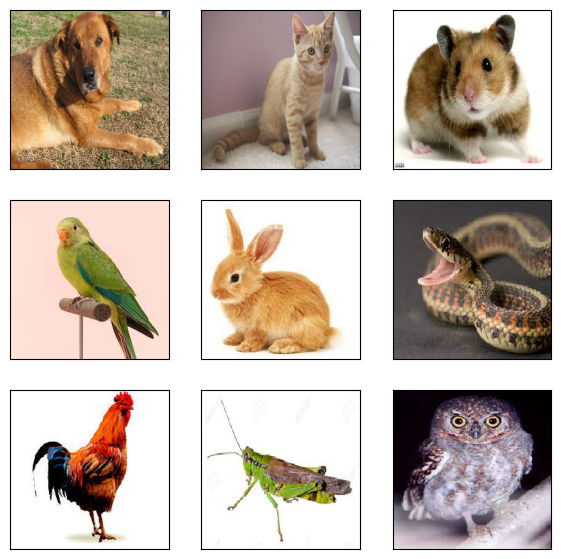

In [ ]:
show_images = [dog_img, cat_img, hamster_img, parrot_img, rabbit_img, snake_img, chicken_img, grasshopper_img, owl_img]

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(show_images[i], cmap=plt.cm.binary)
plt.show()

### VGG16 모델에 맞는 형태로 데이터를 전처리해준다

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

arr_dog = img_to_array(dog_img)
arr_cat = img_to_array(cat_img)
arr_hamster = img_to_array(hamster_img)
arr_parrot = img_to_array(parrot_img)
arr_rabbit = img_to_array(rabbit_img)
arr_snake = img_to_array(snake_img)
arr_chicken = img_to_array(chicken_img)
arr_grasshopper = img_to_array(grasshopper_img)
arr_owl = img_to_array(owl_img)

In [ ]:
print('shape of arr_dog = {}'.format(arr_dog.shape))
print('shape of arr_cat = {}'.format(arr_cat.shape))
print('shape of arr_hamster = {}'.format(arr_hamster.shape))
print('shape of arr_parrot = {}'.format(arr_parrot.shape))
print('shape of arr_rabbit = {}'.format(arr_rabbit.shape))
print('shape of arr_snake = {}'.format(arr_snake.shape))
print('shape of arr_chicken = {}'.format(arr_chicken.shape))
print('shape of arr_grasshopper = {}'.format(arr_grasshopper.shape))
print('shape of arr_owl = {}'.format(arr_owl.shape))

shape of arr_dog = (224, 224, 3)
shape of arr_cat = (224, 224, 3)
shape of arr_hamster = (224, 224, 3)
shape of arr_parrot = (224, 224, 3)
shape of arr_rabbit = (224, 224, 3)
shape of arr_snake = (224, 224, 3)
shape of arr_chicken = (224, 224, 3)
shape of arr_grasshopper = (224, 224, 3)
shape of arr_owl = (224, 224, 3)


In [ ]:
# batch_size = 9 구현하기 위해서 아홉 장의 이미지를 하나로 합친다

import numpy as np

arr_input = np.stack([arr_dog, arr_cat, arr_hamster, arr_parrot, arr_rabbit, arr_snake, arr_chicken, arr_grasshopper, arr_owl])

In [ ]:
# 하나로 합친 이미지의 크기를 확인한다

print('shape of arr_input = {}'.format(arr_input.shape))

shape of arr_input = (9, 224, 224, 3)


### 입력 이미지에 대한 '예측' 실행하기

In [ ]:
pred = model.predict(arr_input)

1/1 [==============================] - 0s 154ms/step


In [ ]:
# 입력 이미지에 대한 예측 결과 가져오기

from tensorflow.keras.applications.vgg16 import decode_predictions

results = decode_predictions(pred)

In [ ]:
# 개의 이미지에 대한 예측 결과 확인

pred_dog = results[0][0][1:3]
pred_dog

('Weimaraner', 0.6688963)

In [ ]:
# 고양이의 이미지에 대한 예측 결과 확인

pred_cat = results[1][0][1:3]
pred_cat

('Egyptian_cat', 0.5332376)

In [ ]:
# 햄스터의 이미지에 대한 예측 결과 확인

pred_hamster = results[2][0][1:3]
pred_hamster

('hamster', 0.9482252)

In [ ]:
# 앵무새의 이미지에 대한 예측 결과 확인

pred_parrot = results[3][0][1:3]
pred_parrot

('indigo_bunting', 0.633082)

In [ ]:
# 토끼의 이미지에 대한 예측 결과 확인

pred_rabbit = results[4][0][1:3]
pred_rabbit

('hare', 0.7699069)

In [ ]:
# 뱀의 이미지에 대한 예측 결과 확인

pred_snake = results[5][0][1:3]
pred_snake

('horned_viper', 0.38014555)

In [ ]:
# 닭의 이미지에 대한 예측 결과 확인

pred_chicken = results[6][0][1:3]
pred_chicken

('cock', 0.8224199)

In [ ]:
# 메뚜기의 이미지에 대한 예측 결과 확인

pred_grasshopper = results[7][0][1:3]
pred_grasshopper

('grasshopper', 0.69904363)

In [ ]:
# 올빼미의 이미지에 대한 예측 결과 확인

pred_owl = results[8][0][1:3]
pred_owl

('ruffed_grouse', 0.251176)

## 결과 정리

In [ ]:
# VGG 16 모델 활용 아홉 종류 동물 사진 예측 결과 및 정확도

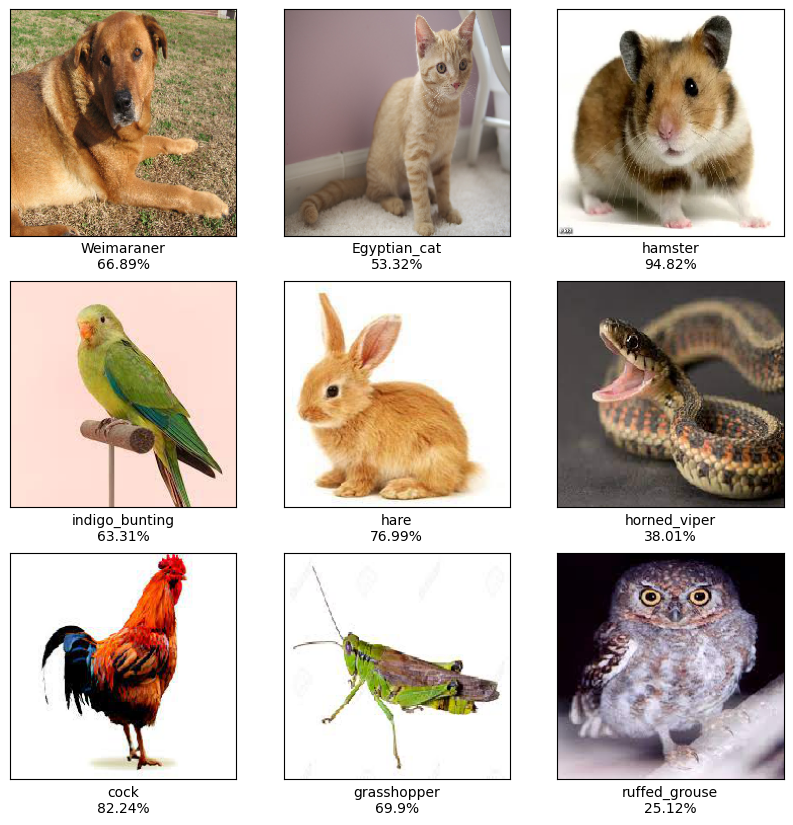

In [ ]:
pred_species = [pred_dog[0], pred_cat[0], pred_hamster[0], pred_parrot[0],
                pred_rabbit[0], pred_snake[0], pred_chicken[0],
                pred_grasshopper[0], pred_owl[0]]
pred_accuracy = [pred_dog[1], pred_cat[1], pred_hamster[1], pred_parrot[1],
                pred_rabbit[1], pred_snake[1], pred_chicken[1],
                pred_grasshopper[1], pred_owl[1]]

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(show_images[i], cmap=plt.cm.binary)
    plt.xlabel(pred_species[i] +'\n' + str(round(pred_accuracy[i]*100,2)) + '%')


plt.show()

## 추가 사항



**1.   VGG16 모델 외 다른 알고리즘 기반 이미지 학습 및 예측 정확도 계산**




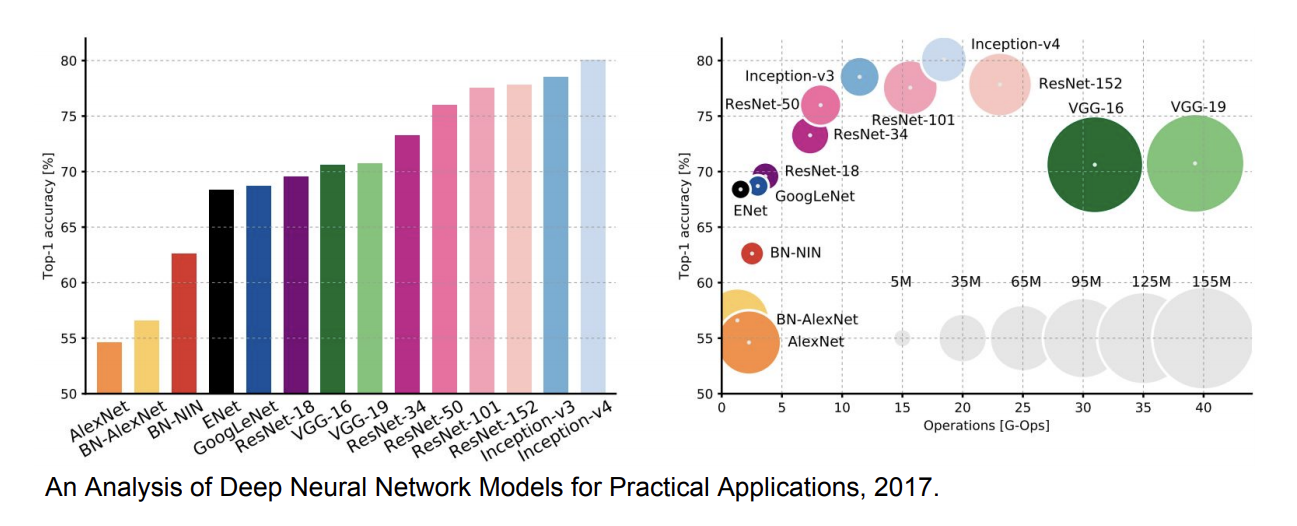

**2.   여러 이미지 학습 알고리즘의 수학적 모델 설명**



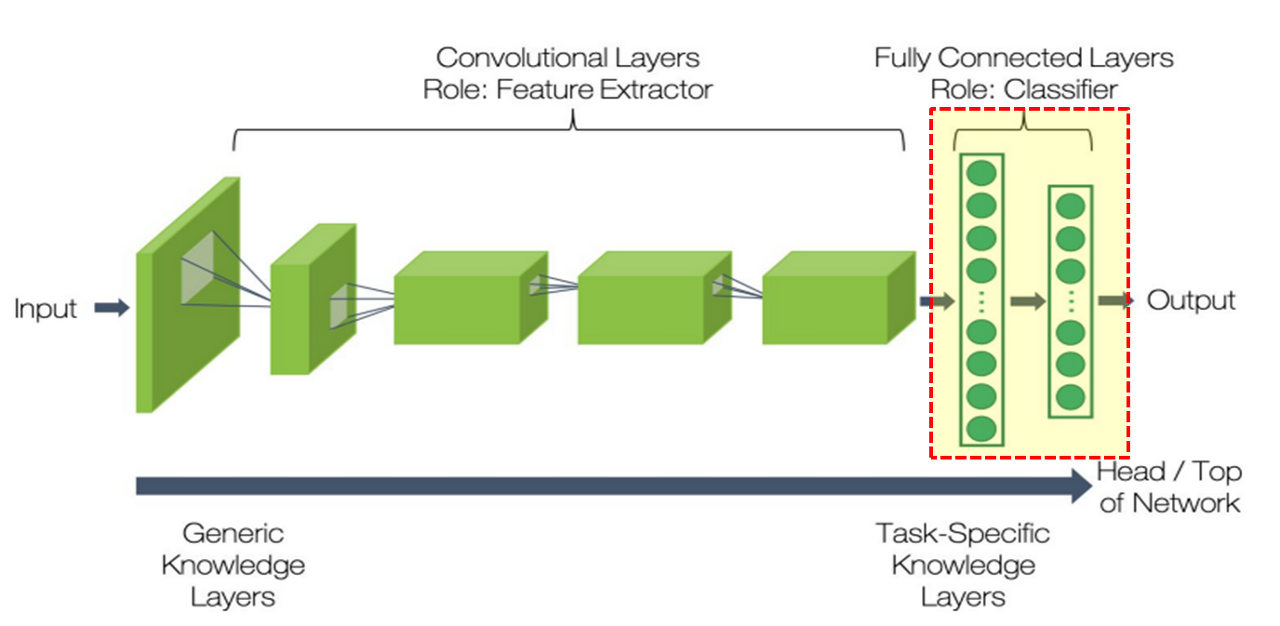

